# Plant Disease Identification

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


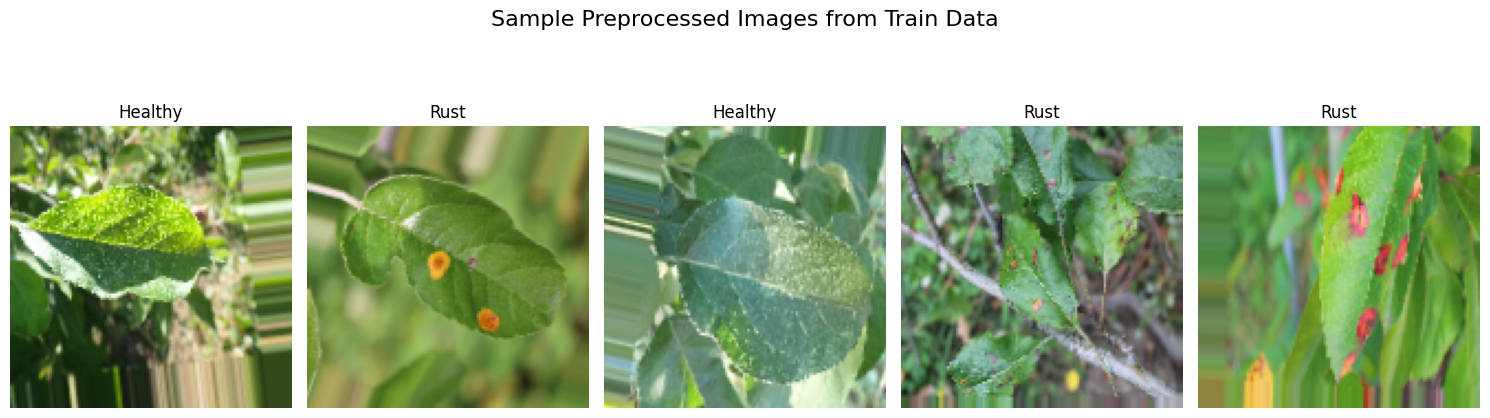

In [2]:
# Paths to the data
data_dir = "PLantData"
train_dir = os.path.join(data_dir, "Train")
validate_dir = os.path.join(data_dir, "Validate")
test_dir = os.path.join(data_dir, "Test")

# Image preprocessing
img_size = (128, 128)  # Resize images to 128x128
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale for validation and test
validate_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validate_data = validate_datagen.flow_from_directory(
    validate_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# EDA: Visualize sample images from each class
def plot_sample_images(data, title):
    classes = list(data.class_indices.keys())  # Class names
    fig, axes = plt.subplots(len(classes), 5, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)

    # Initialize a counter for each class
    class_sample_count = {cls: 0 for cls in classes}
    max_samples_per_class = 5  # Display up to 5 images per class

    for img_path, label in zip(data.filepaths, data.labels):
        cls_name = classes[label]  # Convert label to class name
        if class_sample_count[cls_name] < max_samples_per_class:
            # Load and plot the image
            img = plt.imread(img_path)
            ax = axes[classes.index(cls_name), class_sample_count[cls_name]]
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(cls_name)
            class_sample_count[cls_name] += 1

        # Break the loop early if all samples are filled
        if all(count >= max_samples_per_class for count in class_sample_count.values()):
            break

    plt.tight_layout()
    plt.show()


# Show preprocessed images
def plot_preprocessed_images(data, title):
    images, labels = next(data)
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    for i in range(5):
        axes[i].imshow(images[i])
        axes[i].axis("off")
        label = list(data.class_indices.keys())[np.argmax(labels[i])]
        axes[i].set_title(label)
    plt.tight_layout()
    plt.show()

plot_preprocessed_images(train_data, "Sample Preprocessed Images from Train Data")

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4520 - loss: 1.1393 - val_accuracy: 0.5667 - val_loss: 0.8834
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6161 - loss: 0.8219 - val_accuracy: 0.6667 - val_loss: 0.7414
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7294 - loss: 0.6580 - val_accuracy: 0.7333 - val_loss: 0.5309
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8116 - loss: 0.5271 - val_accuracy: 0.7500 - val_loss: 0.8440
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8524 - loss: 0.4396 - val_accuracy: 0.7667 - val_loss: 0.6563
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8534 - loss: 0.4218 - val_accuracy: 0.8000 - val_loss: 0.4378
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8577 - loss: 0.4251 - val_accuracy: 0.8667 - val_loss: 0.3588
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9035 - loss: 0.3343 - val_accuracy: 0.9167 - val_loss: 0.2772
Epo

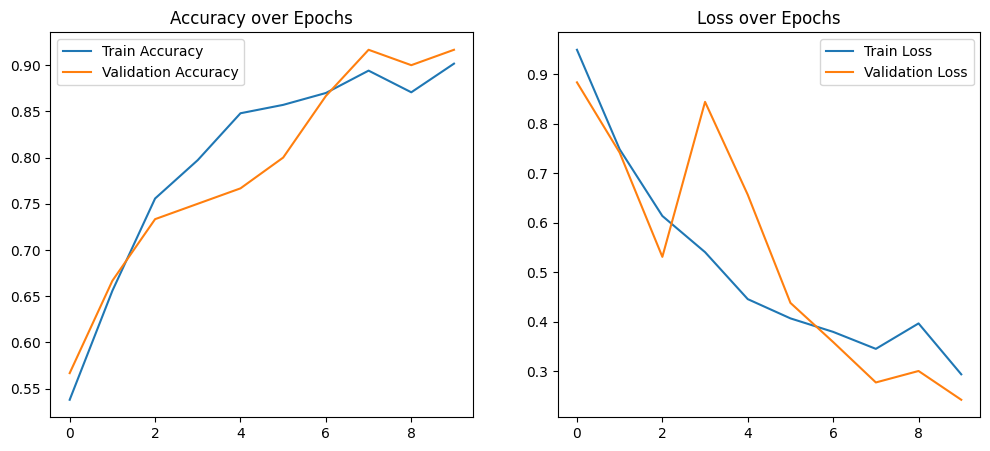

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


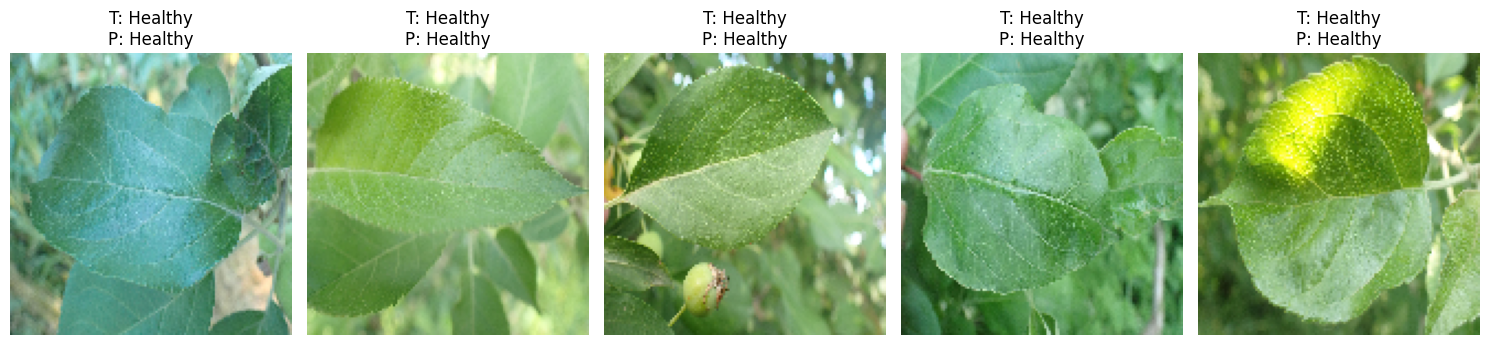

In [3]:
# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validate_data
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Visualize results
def plot_results(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.show()

plot_results(history)

# Testing: Visualize test images with predictions
def plot_test_predictions(model, test_data):
    test_images, test_labels = next(test_data)
    predictions = model.predict(test_images)

    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        axes[i].imshow(test_images[i])
        axes[i].axis("off")
        true_label = list(test_data.class_indices.keys())[np.argmax(test_labels[i])]
        predicted_label = list(test_data.class_indices.keys())[np.argmax(predictions[i])]
        axes[i].set_title(f"T: {true_label}\nP: {predicted_label}")
    plt.tight_layout()
    plt.show()

plot_test_predictions(model, test_data)
